In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/my projects/NLP/Amazon_review.csv')
data.head()

,Unnamed: 0,review,sentiment
0,1959029,I just adopted a chocolate lab who loves to sn...,1
1,971879,Watched it and wasn't very impressed. It was t...,0
2,44681,"By 1967, enough was enough with the light fluf...",0
3,793119,I was interested in what all the hype was abou...,0
4,2921599,I expected a well written book (as someone rec...,0


In [ ]:
data.isna().sum()

Unnamed: 0    0
review        0
sentiment     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100800 entries, 0 to 100799
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100800 non-null  int64 
 1   review      100800 non-null  object
 2   sentiment   100800 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [ ]:
# dropping null values
df = data.dropna()

# checking for any duplicate in the data
df.duplicated().sum()

0

In [ ]:
data.shape

(100800, 3)

sentiment
1    50515
0    50285
Name: count, dtype: int64


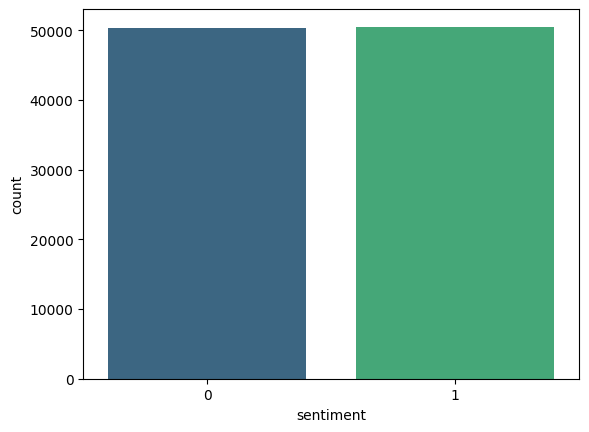

In [ ]:
print(data.sentiment.value_counts())
sns.barplot(x=data.sentiment.value_counts().index, y=data.sentiment.value_counts(), palette="viridis")
plt.show()

In [ ]:
def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")                # replaces @ with at
    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")  #replaces non allpha numeric characters with space
    df[field] = df[field].str.replace(r"http\S+","")              #remove http links
    df[field] = df[field].str.lower()
    return df

clean_text(data,"review")

,Unnamed: 0,review,sentiment
0,1959029,i just adopted a chocolate lab who loves to sn...,1
1,971879,watched it and wasn't very impressed. it was t...,0
2,44681,"by 1967, enough was enough with the light fluf...",0
3,793119,i was interested in what all the hype was abou...,0
4,2921599,i expected a well written book (as someone rec...,0
...,...,...,...
100795,403595,i purchased this product for my 1 year old twi...,0
100796,359264,"when reading this book, you will probably find...",1
100797,3329894,this video has some really great tunes the muc...,1
100798,367123,"i did finish the movie, but it was only rallyi...",0


In [ ]:
x = data.iloc[:,1]
y = data.iloc[:,-1]

In [ ]:
x.head()

0    i just adopted a chocolate lab who loves to sn...
1    watched it and wasn't very impressed. it was t...
2    by 1967, enough was enough with the light fluf...
3    i was interested in what all the hype was abou...
4    i expected a well written book (as someone rec...
Name: review, dtype: object

In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
%pip install emoji --upgrade
import emoji, bz2

In [ ]:
def remove_abb(text):
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"We're", "We are", text)
    text = re.sub(r"That's", "That is", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"Can't", "Cannot", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"don\x89Ûªt", "do not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"What's", "What is", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"There's", "There is", text)
    text = re.sub(r"He's", "He is", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"You're", "You are", text)
    text = re.sub(r"I'M", "I am", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"i'm", "I am", text)
    text = re.sub(r"I\x89Ûªm", "I am", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"Isn't", "is not", text)
    text = re.sub(r"Here's", "Here is", text)
    text = re.sub(r"you've", "you have", text)
    text = re.sub(r"you\x89Ûªve", "you have", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"we've", "we have", text)
    text = re.sub(r"it\x89Ûªs", "it is", text)
    text = re.sub(r"doesn\x89Ûªt", "does not", text)
    text = re.sub(r"It\x89Ûªs", "It is", text)
    text = re.sub(r"Here\x89Ûªs", "Here is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"I\x89Ûªve", "I have", text)
    text = re.sub(r"y'all", "you all", text)
    text = re.sub(r"can\x89Ûªt", "cannot", text)
    text = re.sub(r"would've", "would have", text)
    text = re.sub(r"it'll", "it will", text)
    text = re.sub(r"we'll", "we will", text)
    text = re.sub(r"wouldn\x89Ûªt", "would not", text)
    text = re.sub(r"We've", "We have", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"Y'all", "You all", text)
    text = re.sub(r"Weren't", "Were not", text)
    text = re.sub(r"Didn't", "Did not", text)
    text = re.sub(r"they'll", "they will", text)
    text = re.sub(r"they'd", "they would", text)
    text = re.sub(r"DON'T", "DO NOT", text)
    text = re.sub(r"That\x89Ûªs", "That is", text)
    text = re.sub(r"they've", "they have", text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"should've", "should have", text)
    text = re.sub(r"You\x89Ûªre", "You are", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"Don\x89Ûªt", "Do not", text)
    text = re.sub(r"we'd", "we would", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"They're", "They are", text)
    text = re.sub(r"Can\x89Ûªt", "Cannot", text)
    text = re.sub(r"you\x89Ûªll", "you will", text)
    text = re.sub(r"I\x89Ûªd", "I would", text)
    text = re.sub(r"let's", "let us", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"i've", "I have", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"i'll", "I will", text)
    text = re.sub(r"doesn't", "does not",text)
    text = re.sub(r"i'd", "I would", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"ain't", "am not", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"I've", "I have", text)
    text = re.sub(r"Don't", "do not", text)
    text = re.sub(r"I'll", "I will", text)
    text = re.sub(r"I'd", "I would", text)
    text = re.sub(r"Let's", "Let us", text)
    text = re.sub(r"you'd", "You would", text)
    text = re.sub(r"It's", "It is", text)
    text = re.sub(r"Ain't", "am not", text)
    text = re.sub(r"Haven't", "Have not", text)
    text = re.sub(r"Could've", "Could have", text)
    text = re.sub(r"youve", "you have", text)
    text = re.sub(r"donå«t", "do not", text)
    return text

In [ ]:
def remove_emoji(text):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text=emoji_clean.sub(r'',text)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    text=url_clean.sub(r'',text)
    return text

In [ ]:
# cleaning data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
#lemmatizing
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = remove_abb(text)
    text = remove_emoji(text)
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    text = [lemmatizer.lemmatize(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

data["clean_review"] = data["review"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data.to_csv('/content/drive/MyDrive/my projects/NLP/data.csv', index=False)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/my projects/NLP/data.csv")

In [5]:
data.head()

,Unnamed: 0,review,sentiment,clean_review
0,1959029,i just adopted a chocolate lab who loves to sn...,1,adopted chocolate lab love snuggle rub furnitu...
1,971879,watched it and wasn't very impressed. it was t...,0,watched impressed taken 30 min le 70 tv show c...
2,44681,"by 1967, enough was enough with the light fluf...",0,1967 enough enough light fluff comedy starring...
3,793119,i was interested in what all the hype was abou...,0,interested hype like book nicely banded pretty...
4,2921599,i expected a well written book (as someone rec...,0,expected well written book someone recommended...


In [2]:
from wordcloud import WordCloud

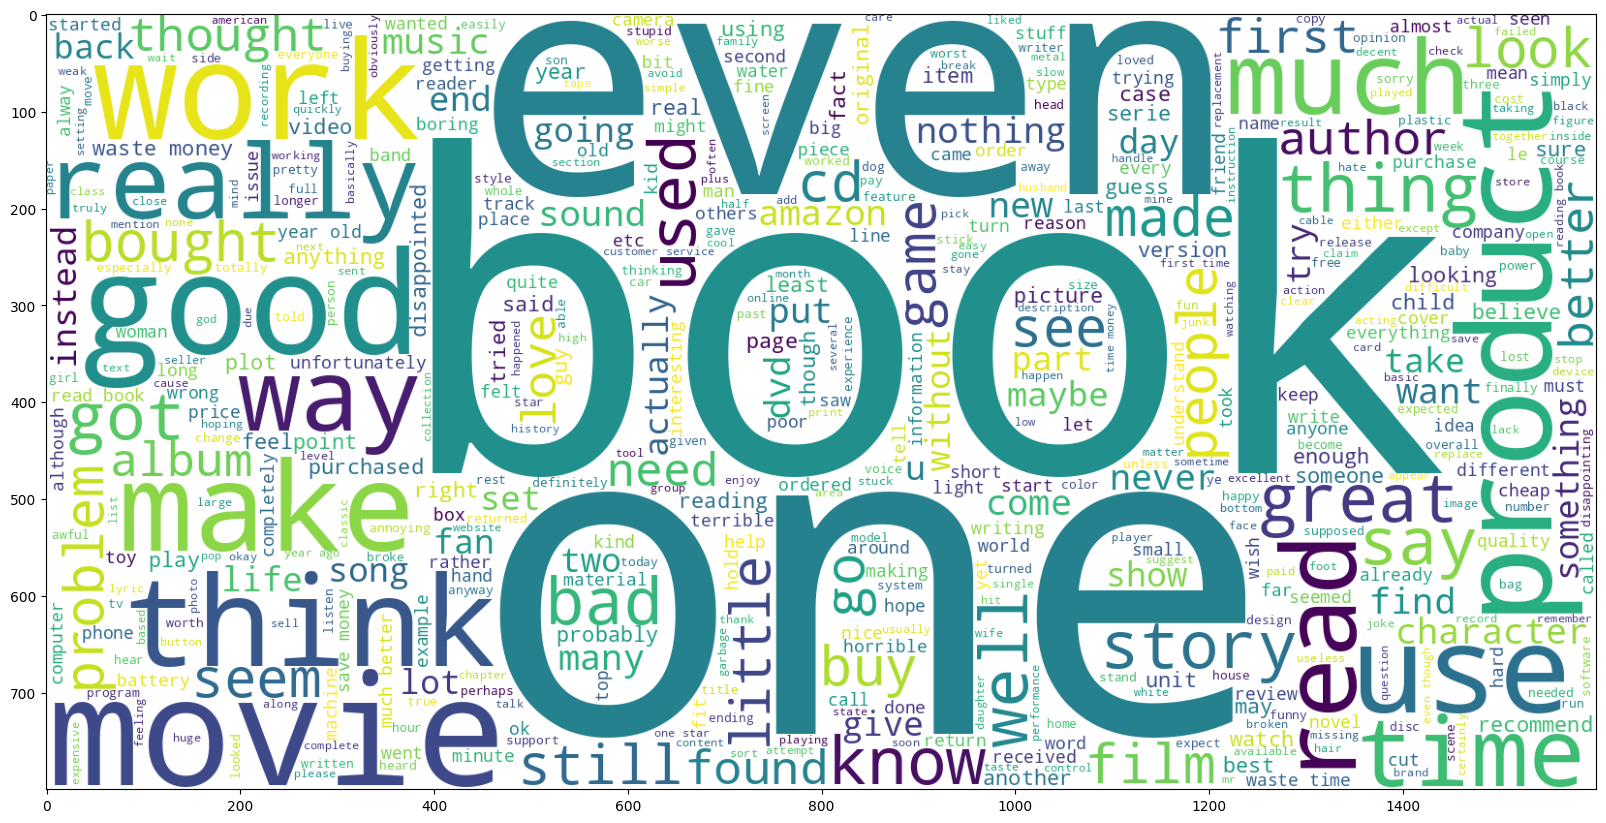

In [6]:
# Negative Review WordCloud
plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600,
               background_color="white").generate(" ".join(data[data["sentiment"]==0].clean_review))
plt.imshow(wc1)

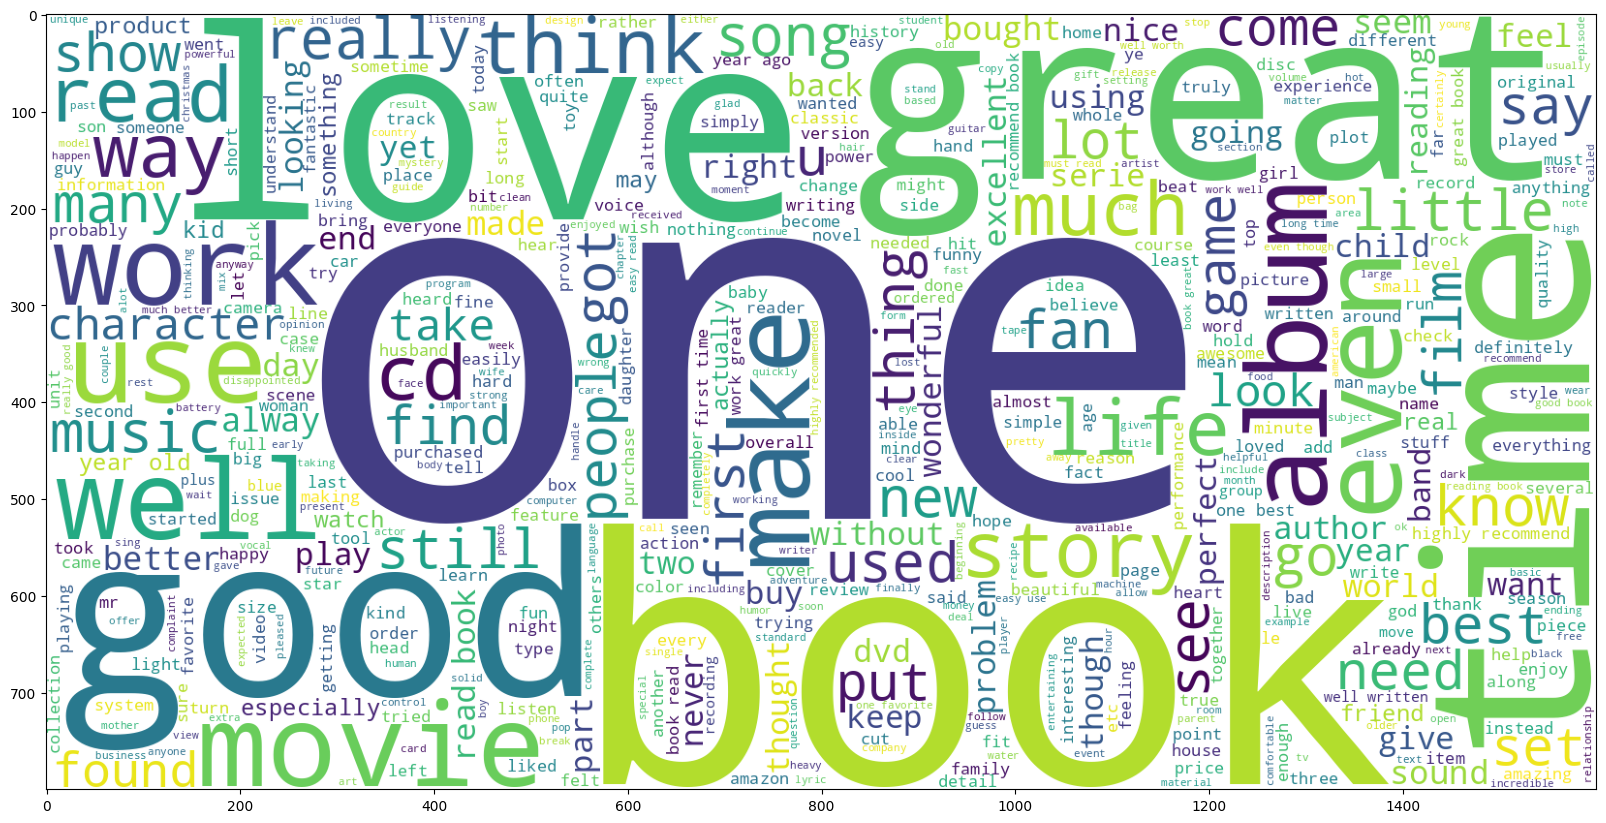

In [7]:
# Positive Review WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600,
               background_color="white").generate(" ".join(data[data["sentiment"]==1].clean_review))
plt.imshow(wc)

In [3]:
y = data.iloc[:,2]
x = data.iloc[:,3]

In [17]:
#Count vectorizer for bag of words
from sklearn.feature_extraction.text import CountVectorizer


cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_reviews=cv.fit_transform(x)

In [18]:
#Tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tf_idf_reviews=tv.fit_transform(x)
print(tf_idf_reviews.shape)

(100800, 4848583)


In [19]:
from sklearn.model_selection import train_test_split

bow_train, bow_test, tf_train, tf_test, y_train, y_test = train_test_split(cv_reviews, tf_idf_reviews, y,test_size=0.2, random_state=0)

In [20]:
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, mean_absolute_error, f1_score

def compute_metrics(y_train, y_test, y_pred, x_train, model):
    # Computing test accuracy
    test_acc = accuracy_score(y_test, y_pred)

    # Computing train accuracy
    train_acc = model.score(x_train, y_train)

    # Computing precision score
    precision = precision_score(y_test, y_pred, average='macro')

    # Computing recall score
    recall = recall_score(y_test, y_pred, average='macro')

    # Computing mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Computing mean absolute error
    mae = mean_absolute_error(y_test, y_pred)

    # Computing F1 score
    f1 = f1_score(y_test, y_pred, average='macro')

    # Printing computed metrics
    print('Test accuracy score: {:.2f}%'.format(test_acc * 100))
    print('Train accuracy score: {:.2f}%'.format(train_acc * 100))
    print('Precision score: {:.2f}'.format(precision))
    print('Recall score: {:.2f}'.format(recall))
    print('Mean Squared Error: {:.2f}'.format(mse))
    print('Mean Absolute Error: {:.2f}'.format(mae))
    print('F1-score: {:.2f}'.format(f1))

    # Printing classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Printing confusion matrix
    print("Confusion Matrix:")
    conf_mat = confusion_matrix(y_test, y_pred)
    print(conf_mat)

    # Returning computed metrics
    return test_acc, train_acc, precision, recall, mse, mae, f1


In [22]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

#LogisticRegression

In [ ]:
#training the model
lr=LogisticRegression(penalty='none',max_iter=500,C=0.1,random_state=42)
lr_bow=lr.fit(bow_train,y_train)

bow_lr_pred = lr_bow.predict(bow_test)


compute_metrics(y_train, y_test, bow_lr_pred, bow_train, lr_bow)

print("--------------------------------------------------------------")

#Fitting the model for tfidf features
lr_tfidf=lr.fit(tf_train, y_train)

tf_lr_pred = lr_tfidf.predict(tf_test)
compute_metrics(y_train, y_test, tf_lr_pred, bow_train, lr_tfidf)

Test accuracy score: 49.79%
Train accuracy score: 99.99%
Precision score: 0.25
Recall score: 0.50
Mean Squared Error: 0.50
Mean Absolute Error: 0.50
F1-score: 0.33

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     10037
           1       0.00      0.00      0.00     10123

    accuracy                           0.50     20160
   macro avg       0.25      0.50      0.33     20160
weighted avg       0.25      0.50      0.33     20160

Confusion Matrix:
[[10037     0]
 [10123     0]]
--------------------------------------------------------------
Test accuracy score: 49.79%
Train accuracy score: 99.99%
Precision score: 0.25
Recall score: 0.50
Mean Squared Error: 0.50
Mean Absolute Error: 0.50
F1-score: 0.33

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     10037
           1       0.00      0.00      0.00     10123

    accuracy         

(0.4978670634920635,
 0.9999007936507937,
 0.24893353174603175,
 0.5,
 0.5021329365079366,
 0.5021329365079366,
 0.3323840116567871)

In [67]:
y_train.shape

(80640,)

#MultinomialNB

In [68]:
#training the model
nb=MultinomialNB()
nb_bow=lr.fit(bow_train,y_train)

bow_nb_pred = lr_bow.predict(bow_test)


compute_metrics(y_train, y_test, bow_nb_pred, bow_train, nb_bow)

print("--------------------------------------------------------------")

#Fitting the model for tfidf features
nb_tfidf=nb.fit(tf_train, y_train)

tf_nb_pred = nb_tfidf.predict(tf_test)
compute_metrics(y_train, y_test, tf_nb_pred, bow_train, nb_tfidf)

Test accuracy score: 49.79%
Train accuracy score: 99.99%
Precision score: 0.25
Recall score: 0.50
Mean Squared Error: 0.50
Mean Absolute Error: 0.50
F1-score: 0.33

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     10037
           1       0.00      0.00      0.00     10123

    accuracy                           0.50     20160
   macro avg       0.25      0.50      0.33     20160
weighted avg       0.25      0.50      0.33     20160

Confusion Matrix:
[[10037     0]
 [10123     0]]
--------------------------------------------------------------
Test accuracy score: 50.21%
Train accuracy score: 99.99%
Precision score: 0.25
Recall score: 0.50
Mean Squared Error: 0.50
Mean Absolute Error: 0.50
F1-score: 0.33

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10037
           1       0.50      1.00      0.67     10123

    accuracy         

(0.5021329365079366,
 0.9998511904761904,
 0.2510664682539683,
 0.5,
 0.4978670634920635,
 0.4978670634920635,
 0.334279959052934)

# Random Forest

In [ ]:
#training the model
rf = RandomForestClassifier()
rf_bow = rf.fit(bow_train,y_train)

bow_rf_pred = rf_bow.predict(bow_test)


compute_metrics(y_train, y_test, bow_rf_pred, bow_train, rf_bow)

print("--------------------------------------------------------------")

#Fitting the model for tfidf features
rf_tfidf = rf.fit(tf_train, y_train)

tf_rf_pred = rf_tfidf.predict(tf_test)
compute_metrics(y_train, y_test, tf_rf_pred, bow_train, rf_tfidf)

#LightGBM

In [ ]:
#training the model
lgbm = LGBMClassifier()
lgbm_bow = lgbm.fit(bow_train,y_train)

bow_lgbm_pred = lgbm_bow.predict(bow_test)


compute_metrics(y_train, y_test, bow_lgbm_pred, bow_train, lgbm_bow)

print("--------------------------------------------------------------")

#Fitting the model for tfidf features
lgbm_tfidf = lgbm.fit(tf_train, y_train)

tf_lgbm_pred = lgbm_tfidf.predict(tf_test)
compute_metrics(y_train, y_test, tf_lgbm_pred, bow_train, lgbm=_tfidf)

#XG boost

In [ ]:
#training the model
xgb=XGBClassifier()

xgb_bow=xgb.fit(bow_train,y_train)

bow_xgb_pred = xgb_bow.predict(bow_test)
compute_metrics(y_train, y_test, bow_xgb_pred, bow_train, xgb_bow)

print("--------------------------------------------------------------")

#Fitting the model for tfidf features
xgb_tfidf= xgb.fit(tf_train, y_train)

tf_xgb_pred = xgb_tfidf.predict(tf_test)
compute_metrics(y_train, y_test, tf_xgb_pred, bow_train, xgb_tfidf)

#Gradientboost

In [ ]:
#training the model
gb = GradientBoostingClassifier()

gb_bow = gb.fit(bow_train,y_train)

bow_gb_pred = gb_bow.predict(bow_test)
compute_metrics(y_train, y_test, bow_gb_pred, bow_train, gb_bow)

print("--------------------------------------------------------------")

#Fitting the model for tfidf features
gb_tfidf = gb.fit(tf_train, y_train)

tf_gb_pred = gb_tfidf.predict(tf_test)
compute_metrics(y_train, y_test, tf_gb_pred, bow_train, gb_tfidf)

#Decision Tree

In [ ]:
#training the model
dt = DecisionTreeClassifier()

dt_bow = dt.fit(bow_train,y_train)

bow_dt_pred = dt_bow.predict(bow_test)
compute_metrics(y_train, y_test, bow_dt_pred, bow_train, dt_bow)

print("--------------------------------------------------------------")

#Fitting the model for tfidf features
dt_tfidf = dt.fit(tf_train, y_train)

tf_dt_pred = dt_tfidf.predict(tf_test)
compute_metrics(y_train, y_test, tf_dt_pred, bow_train, dt_tfidf)

#Neural_networks

In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [5]:
from sklearn.model_selection import train_test_split
X = x
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
display(X_train.shape)
display(X_test.shape)

(75600,)

(25200,)

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [7]:
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [8]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          5735872   
                                                                 
 bidirectional (Bidirection  (None, 200)               132000    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5893729 (22.48 MB)
Trainable params: 5893729 (22.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


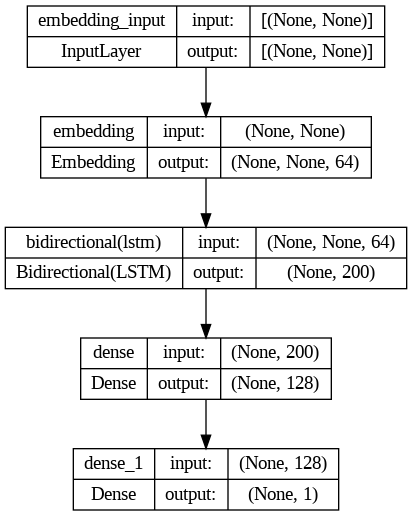

In [9]:
BATCH_SIZE = 64

from keras.utils import plot_model
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(128, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# Used for preventing ovefitting
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [ ]:
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=5,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])

Epoch 1/5
1182/1182 [==============================] - 409s 340ms/step - loss: 0.3807 - accuracy: 0.8278 - val_loss: 0.3414 - val_accuracy: 0.8568
Epoch 2/5
1182/1182 [==============================] - 381s 322ms/step - loss: 0.2364 - accuracy: 0.9059 - val_loss: 0.3780 - val_accuracy: 0.8463
Epoch 3/5
1182/1182 [==============================] - 394s 333ms/step - loss: 0.1561 - accuracy: 0.9402 - val_loss: 0.4271 - val_accuracy: 0.8377
Epoch 4/5
 198/1182 [====>.........................] - ETA: 4:49 - loss: 0.0785 - accuracy: 0.9726

In [12]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

788/788 [==============================] - 23s 29ms/step
LSTM Recurrent Neural Network baseline: 0.9992132482175387
LSTM Recurrent Neural Network: 0.8999515689361823


In [13]:
model.evaluate(X_test_seq_padded, y_test)

788/788 [==============================] - 25s 31ms/step - loss: 0.6054 - accuracy: 0.8255


[0.6053871512413025, 0.8254761695861816]

Text(0.5, 1.0, 'Training and Validation Accuracy')

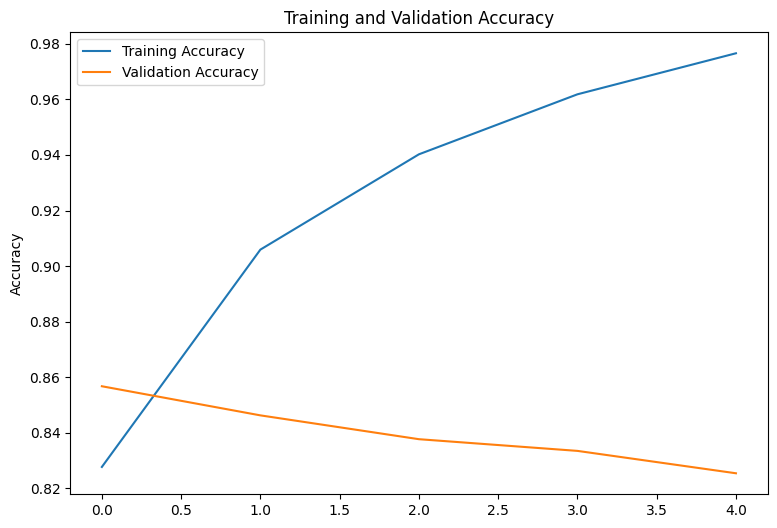

In [14]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

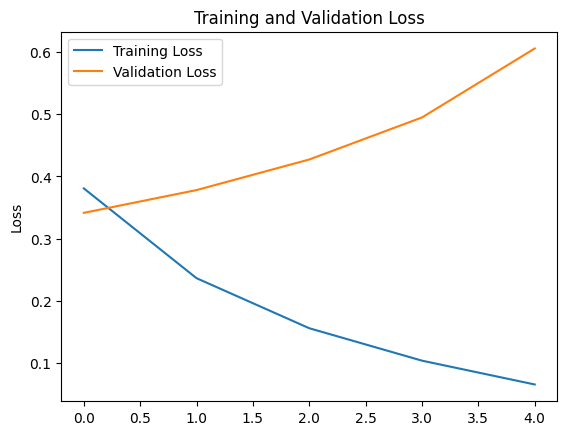

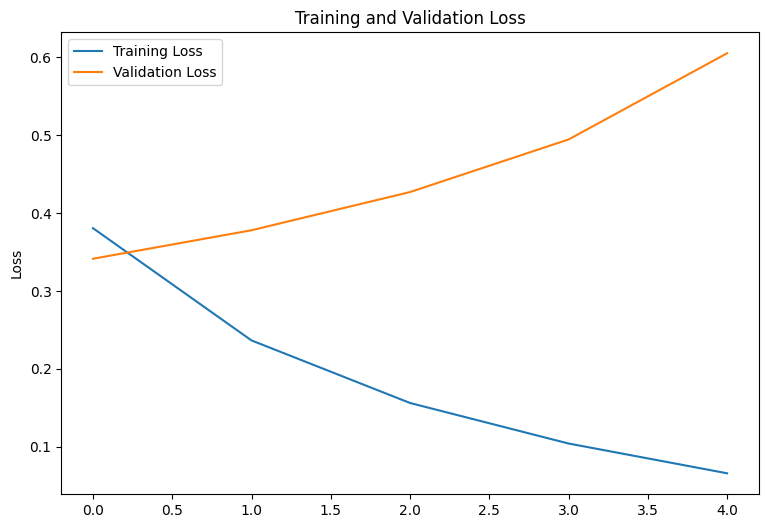

In [16]:
plt.plot(loss,label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.figure(figsize=(9,6))
plt.plot(loss,label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")